In [38]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from kneed import KneeLocator

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [39]:
df_cluster = pd.read_csv('agrupamento.csv')

In [74]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=6).fit(df_cluster)

In [75]:
clustering.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
      dtype=int64)

In [31]:
df_cluster

,x0,x1,x2,x3,x4
0,5.447043,6.319084,2.664620,6.568743,4.802295
1,4.875562,4.796801,2.154231,6.832907,5.321401
2,5.582920,5.060775,1.895917,6.004299,6.330105
3,6.370727,3.717727,1.729007,5.923414,4.533557
4,4.789262,4.510056,0.669330,7.731273,4.272356
...,...,...,...,...,...
80,1.259673,5.616326,6.550793,1.311425,4.030374
81,1.766369,6.436160,7.245960,0.466190,3.877670
82,0.945620,6.091671,6.339883,0.928810,2.875518
83,1.200856,7.094901,7.915729,1.060148,3.485785


In [35]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_cluster)

In [33]:
sse = []
for k in range(1, 50):
    kmeans = KMeans(init="k-means++", n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

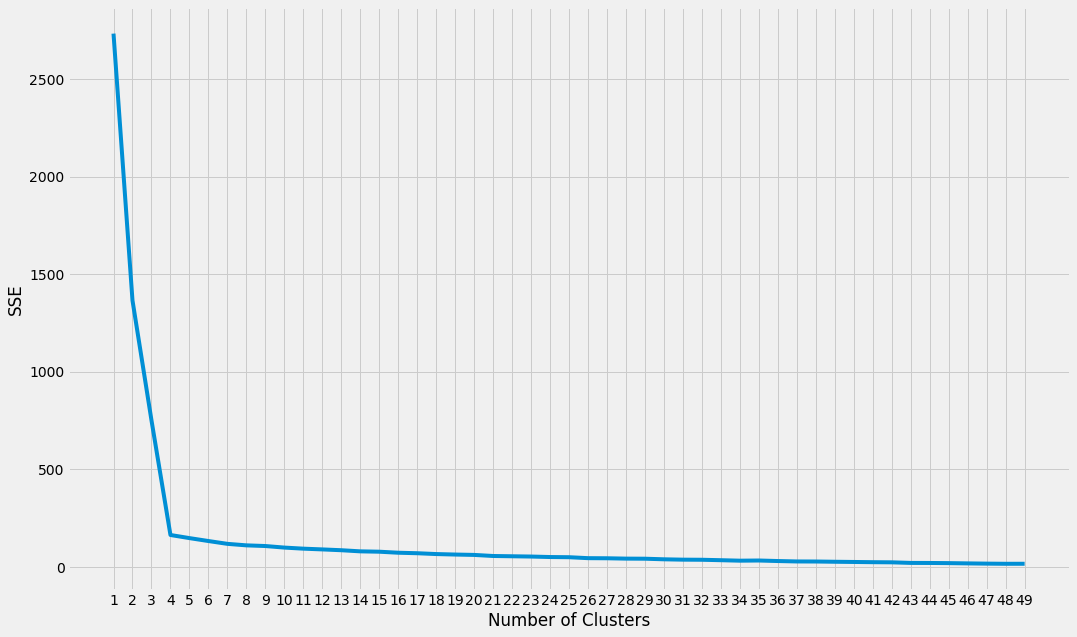

In [34]:
plt.figure(figsize=(16,10))
plt.style.use("fivethirtyeight")
plt.plot(range(1, 50), sse)
plt.xticks(range(1, 50))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [165]:
kl = KneeLocator(
    range(1, 50), sse, curve="convex", direction="decreasing"
)
kl.elbow

4

In [166]:
silhouette_coefficients = []
for k in range(2, 50):
    kmeans = KMeans(init="k-means++", n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

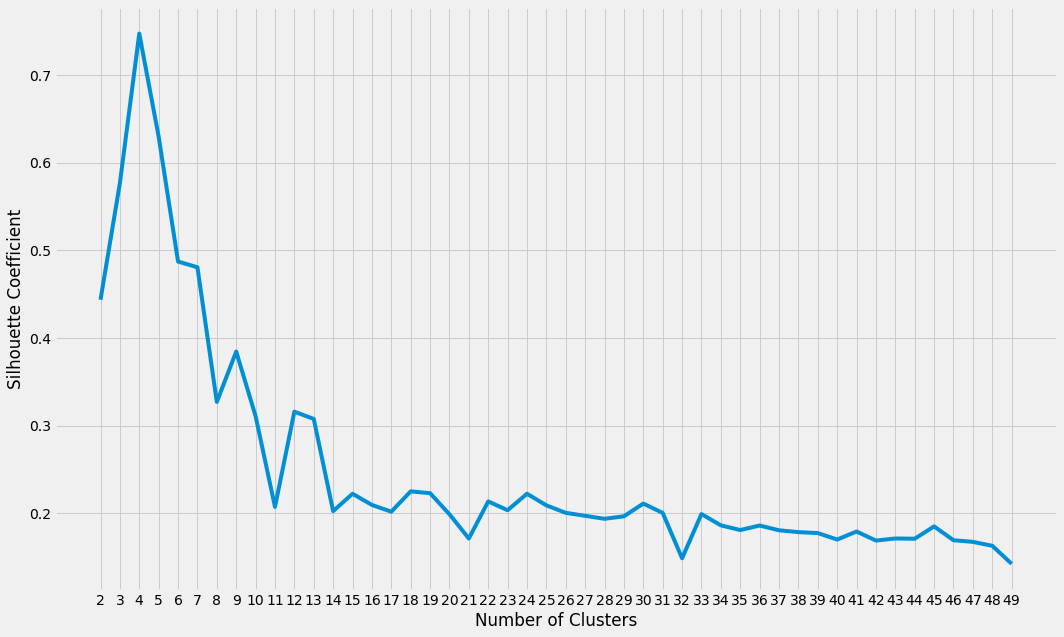

In [167]:
plt.figure(figsize=(16,10))
plt.style.use("fivethirtyeight")
plt.plot(range(2, 50), silhouette_coefficients)
plt.xticks(range(2, 50))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [168]:
kmeans = KMeans(init="k-means++", n_clusters=4, random_state=42)
kmeans.fit(scaled_features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [169]:
df_cluster['label'] = kmeans.labels_
df_cluster

,x0,x1,x2,x3,x4,label
0,5.447043,6.319084,2.664620,6.568743,4.802295,2
1,4.875562,4.796801,2.154231,6.832907,5.321401,2
2,5.582920,5.060775,1.895917,6.004299,6.330105,2
3,6.370727,3.717727,1.729007,5.923414,4.533557,2
4,4.789262,4.510056,0.669330,7.731273,4.272356,2
...,...,...,...,...,...,...
80,1.259673,5.616326,6.550793,1.311425,4.030374,3
81,1.766369,6.436160,7.245960,0.466190,3.877670,3
82,0.945620,6.091671,6.339883,0.928810,2.875518,3
83,1.200856,7.094901,7.915729,1.060148,3.485785,3


In [170]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_cluster.iloc[:,:-1])

<AxesSubplot:xlabel='pca-one', ylabel='pca-two'>

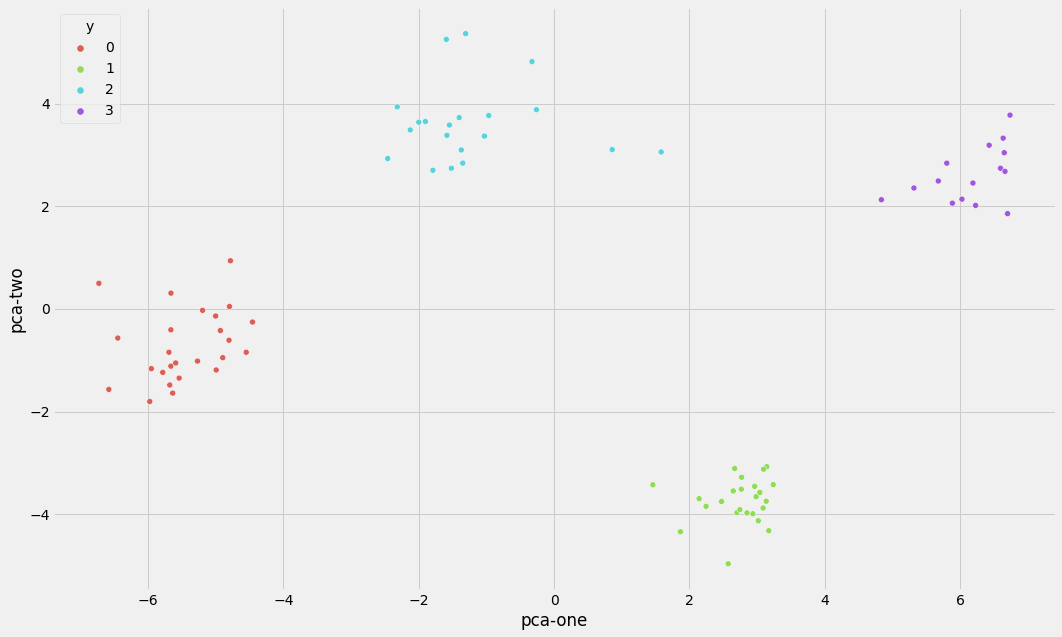

In [171]:
df = pd.DataFrame()
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1]
df['y'] = kmeans.labels_

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", len(set(df['y']))),
    data=df,
    legend="full"
)

In [209]:
tsne = TSNE(n_components=2, verbose=1, n_iter=300)
tsne_results = tsne.fit_transform(df_cluster.iloc[:,:-1])

[t-SNE] Computing 84 nearest neighbors...
[t-SNE] Indexed 85 samples in 0.001s...
[t-SNE] Computed neighbors for 85 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 85 / 85
[t-SNE] Mean sigma: 4.310600
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.815647
[t-SNE] KL divergence after 300 iterations: 0.458287


<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

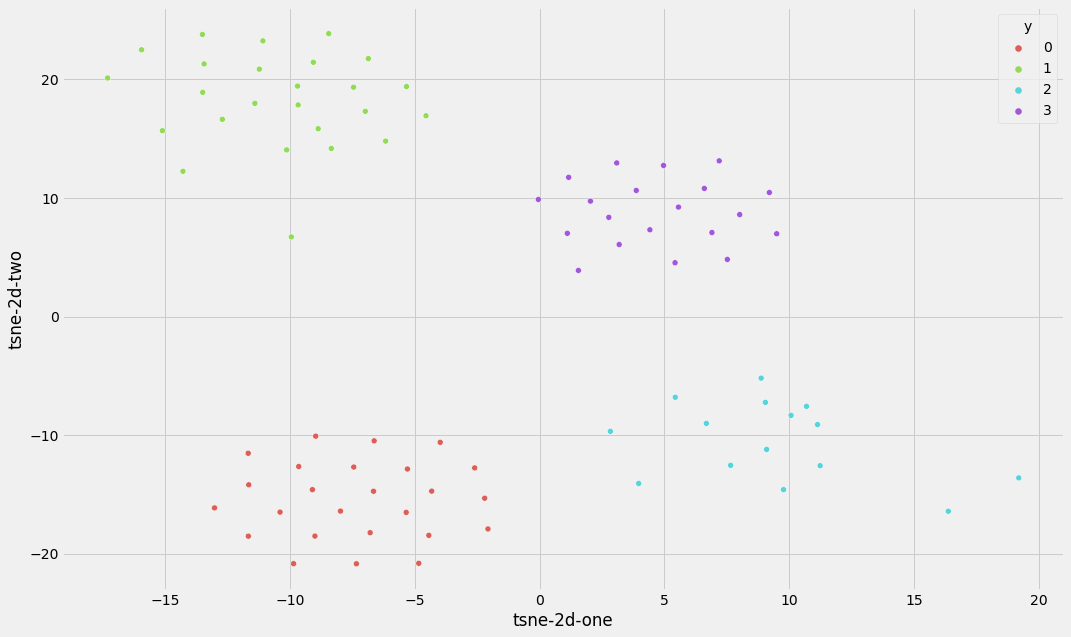

In [210]:
df_subset = pd.DataFrame()
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
df_subset['y'] = kmeans.labels_

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", len(set(df_subset['y']))),
    data=df_subset,
    legend="full"
)

In [182]:
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture

In [185]:
kmeans = KMeans(n_clusters=4)
dbscan = DBSCAN(eps=2)
ac = AgglomerativeClustering(n_clusters=4)
gm = GaussianMixture(n_components=4, random_state=0)

kmeans.fit(scaled_features)
dbscan.fit(scaled_features)
ac.fit(scaled_features)
gm.fit(scaled_features)

kmeans_silhouette = silhouette_score(
    scaled_features, kmeans.labels_
).round(2)
dbscan_silhouette = silhouette_score(
    scaled_features, dbscan.labels_
).round (2)
ac_silhouette = silhouette_score(
    scaled_features, ac.labels_
).round (2)
gm_silhouette = silhouette_score(
    scaled_features, gm.predict(scaled_features)
).round (2)

In [186]:
dbscan.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
      dtype=int64)

In [187]:
kmeans_silhouette

0.75

In [188]:
dbscan_silhouette

0.75

In [189]:
ac_silhouette

0.75

In [190]:
gm_silhouette

0.75